In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

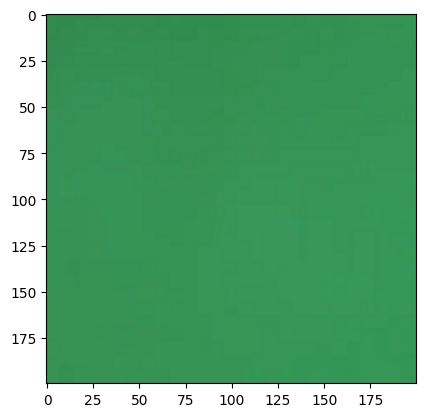

In [2]:
input_image = cv.imread(r"D:\Opencv\class.vision-master\images\green-sccreen.png")

cropped_region = input_image[:200, :200, :]
plt.imshow(cropped_region[...,::-1])

In [3]:
hsv = cv.cvtColor(cropped_region, cv.COLOR_BGR2HSV)
print("HSV: ", np.mean(hsv, axis=(0,1)))

HSV:  [ 70.457575 162.526525 147.248   ]


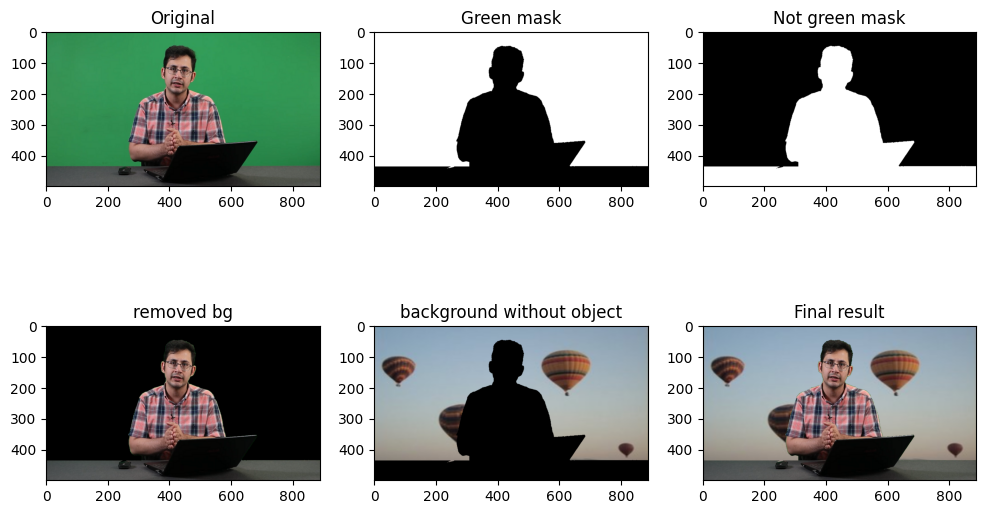

In [6]:
bg_image = cv.imread(r"D:\Opencv\class.vision-master\images\balloon.png")
hsv = cv.cvtColor(input_image, cv.COLOR_BGR2HSV)

h, w, _ = input_image.shape
bg_image = cv.resize(bg_image,(w, h))

l_green = np.array([60,50,50])
u_green = np.array([80,255,255])

mask = cv.inRange(hsv, l_green, u_green)
mask_not_green = cv.bitwise_not(mask)

new_bg = cv.bitwise_and(bg_image, bg_image, mask=mask)
removed_bg = cv.bitwise_and(input_image, input_image, mask=mask_not_green)

final = cv.add(new_bg, removed_bg)

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(input_image[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(mask, cmap='gray');plt.title("Green mask");
plt.subplot(233);plt.imshow(mask_not_green, cmap='gray');plt.title("Not green mask");
#second row
plt.subplot(234);plt.imshow(removed_bg[...,::-1]);plt.title("removed bg");
plt.subplot(235);plt.imshow(new_bg[...,::-1]);plt.title("background without object");
plt.subplot(236);plt.imshow(final[...,::-1]);plt.title("Final result");


In [9]:
cap = cv.VideoCapture("D:\Opencv\class.vision-master\videos\akhavan-green-bg.mp4")
bg_image = cv.imread("D:\Opencv\class.vision-master\images\balloon.png")

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
#resize to frame size
bg_image = cv.resize(bg_image,(w, h))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    background = bg_image.copy()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    l_green = np.array([60, 50, 50])
    u_green = np.array([80, 255, 255])

    mask = cv.inRange(hsv, l_green, u_green)
    mask_not_green = cv.bitwise_not(mask)
    removed_bg = cv.bitwise_and(frame, frame, mask=mask_not_green)
    background = cv.bitwise_and(background, background, mask=mask)

    final = cv.add(removed_bg, background)
    cv2.imshow("result", final)
    cv2.waitKey(25)

        
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
